We have Employee Performance Dataset taken from the hackathon site. 
The dataset contains employee details along with information about their performance. 
The dataset includes features like: 
 employee ID: Unique identifier for each employee 
 Demographics: Age, gender, region, education, etc. 
 Training Details: no_of_trainings, previous_year_rating, avg_training_score, etc. 
 Metrics: KPI, awards, service, etc.  
 is_promoted: Target variable indicating whether the employee recommended for Promotion

In [383]:
# Import All the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
# Read the Test and Train Data
test = pd.read_csv('test_2umaH9m.csv')
train = pd.read_csv('train_LZdllcl.csv')


In [385]:
# Find Total no.of Rows and Columns
train.shape,test.shape

((54808, 14), (23490, 13))

In [386]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [387]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [388]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [389]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [390]:
# Handling of missing data
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(), inplace=True)

In [391]:
train.dropna(subset=['is_promoted'], inplace=True)

In [392]:
train.duplicated().sum()

0

In [393]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [394]:
train['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [395]:
train.is_promoted.value_counts(normalize=True)

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

[Text(0, 0, '50140'), Text(0, 0, '4668')]

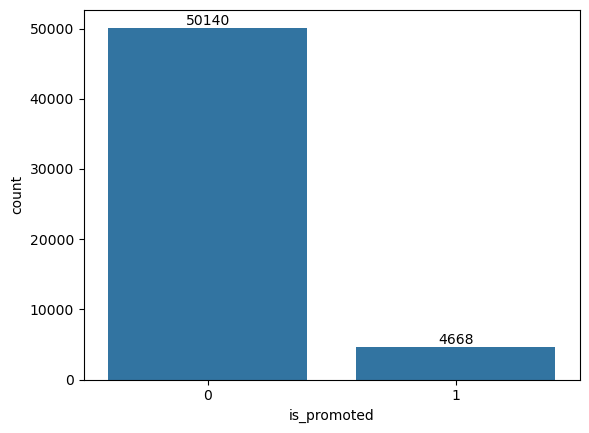

In [396]:
# Explodatory Data Analysis
# Univariate Analysis
ax = sns.countplot(x='is_promoted', data=train)
ax.bar_label(ax.containers[0])

<Axes: xlabel='no_of_trainings', ylabel='avg_training_score'>

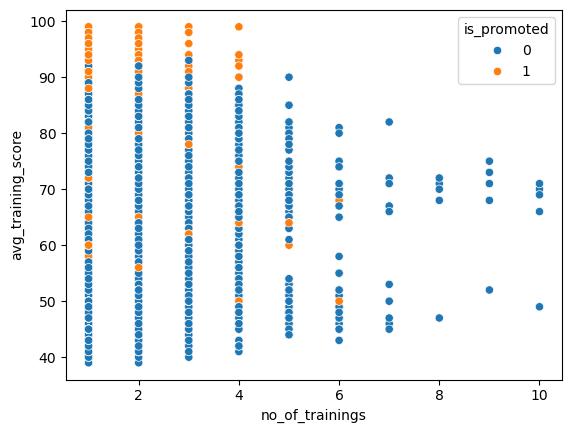

In [397]:
# Bivariate Analysis
sns.scatterplot(x='no_of_trainings',  y = 'avg_training_score', hue = 'is_promoted', data = train)

<Axes: xlabel='previous_year_rating', ylabel='department'>

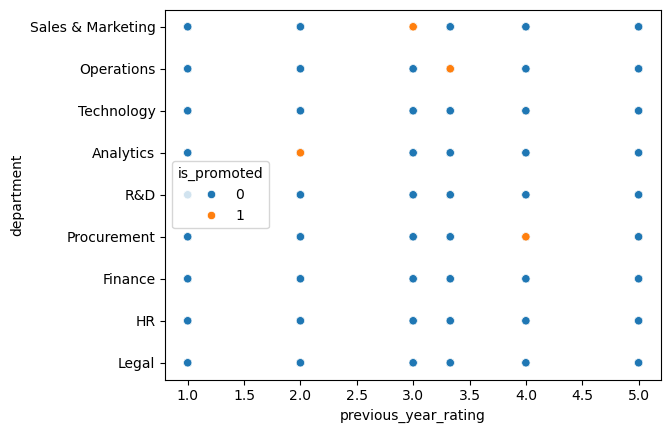

In [398]:
# Bivariate Analysis
sns.scatterplot(x='previous_year_rating',  y = 'department', hue = 'is_promoted', data = train)

<Axes: xlabel='gender', ylabel='education'>

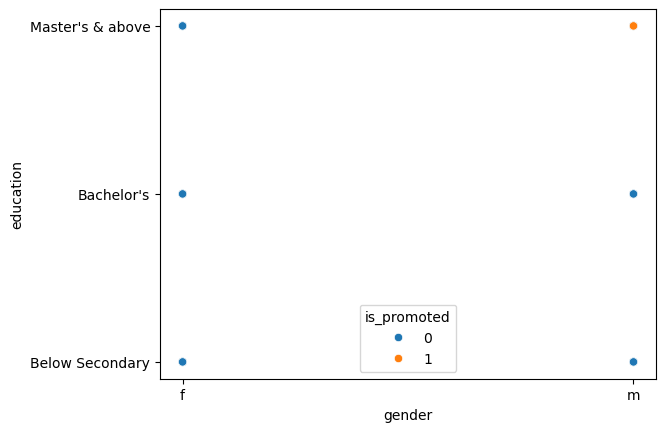

In [399]:
sns.scatterplot(x='gender',  y = 'education', hue = 'is_promoted', data = train)

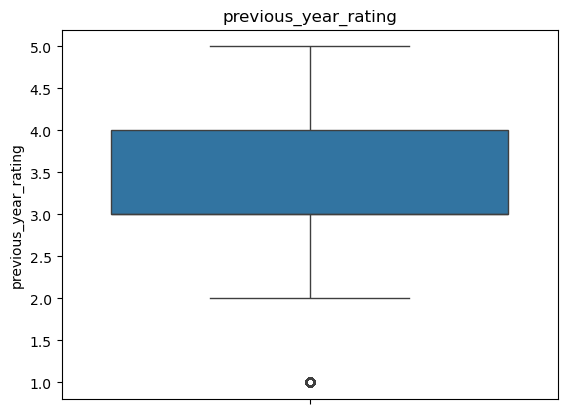

In [400]:
#Univariate Analysis
sns.boxplot(data=train, y="previous_year_rating")
plt.title("previous_year_rating")
plt.show()

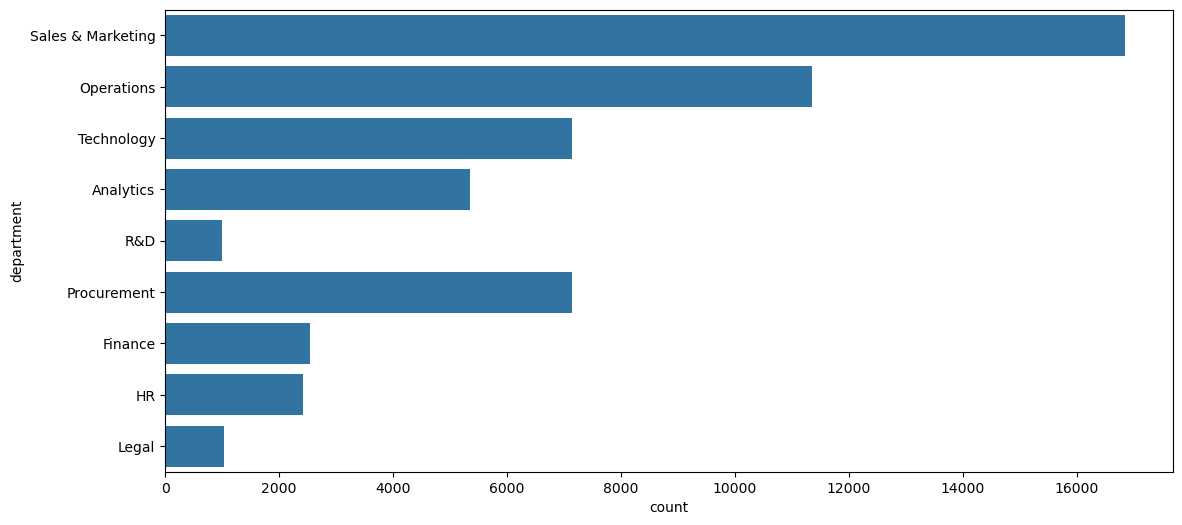

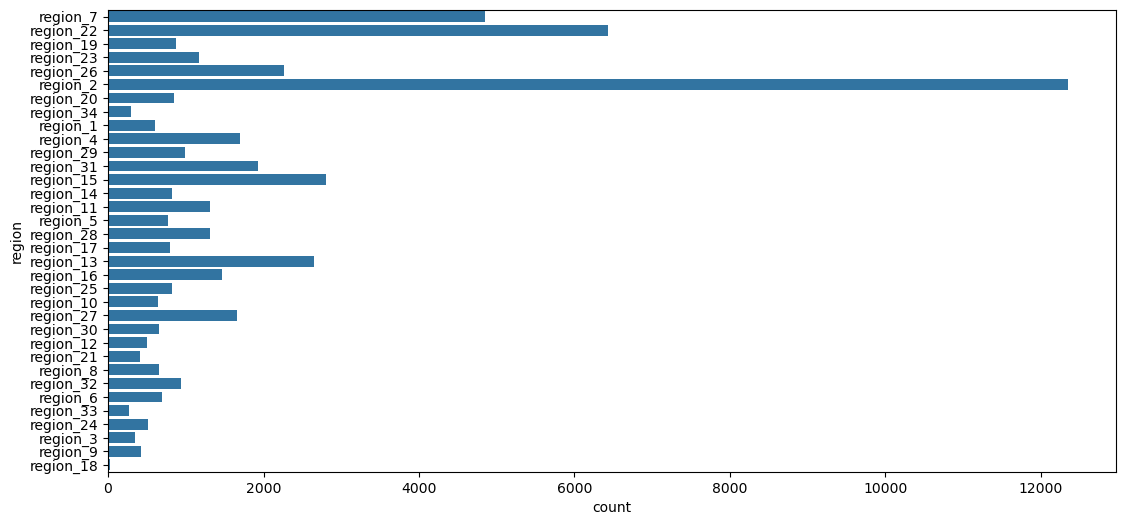

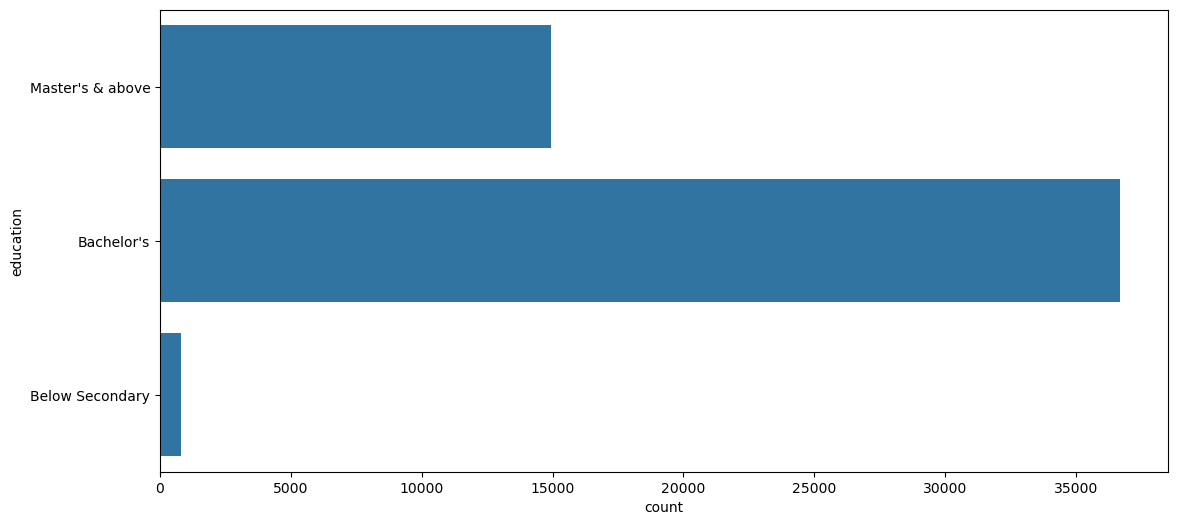

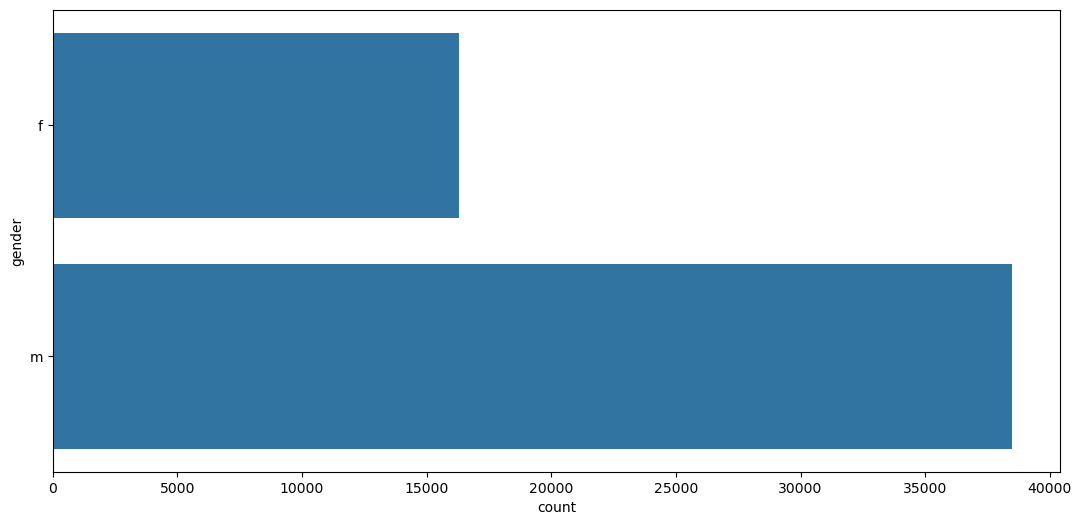

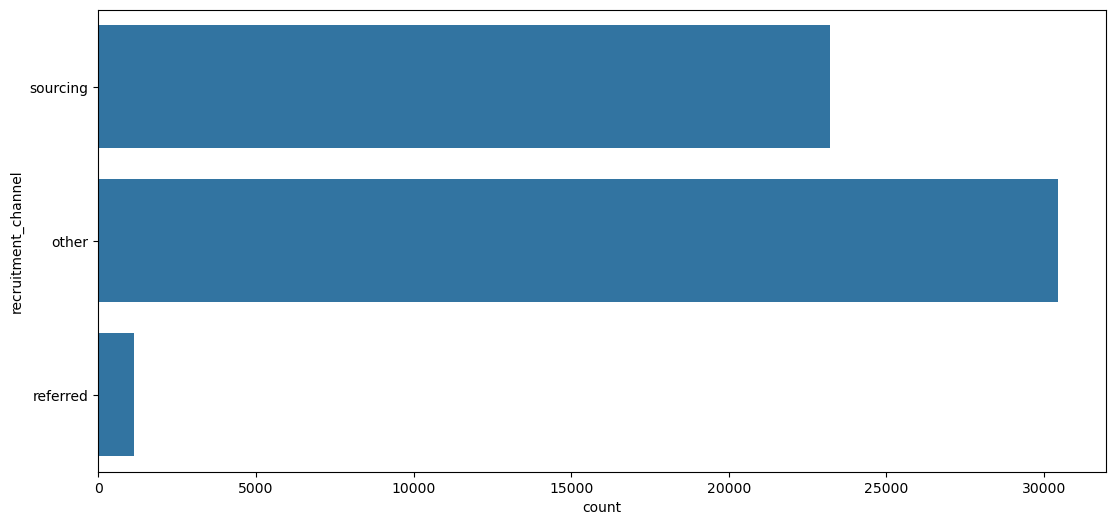

In [401]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(13,6))
    sns.countplot(y=train[col])
    plt.show()

# Around 30% emplyess are from sales and marketing
# Around 20% employee from region 2
# Only 18% master degree and 70% are Bachelors
# 50% are recurited from Source
# 80% are Male Employee 


In [402]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [403]:
train.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,54808.0,3.329256,1.211661,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [404]:
train.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [405]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [406]:
for col in train.drop(columns=ign_cols).columns:
    print(col, train[col].nunique(), '=>',train[col].unique())

department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 6 => [5.         3.         1.         4.         3.32925578 2.        ]
length_of_service 35 => [ 8

<Axes: xlabel='avg_training_score', ylabel='Density'>

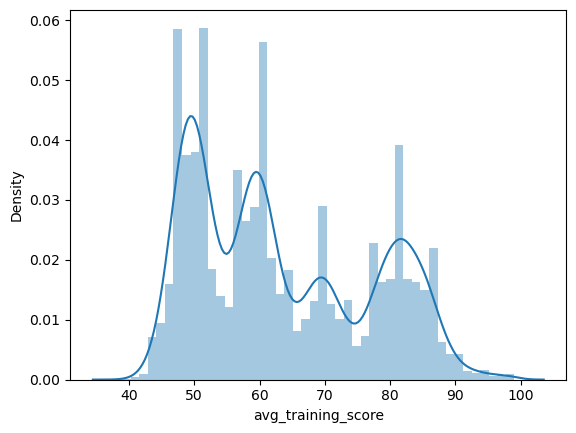

In [407]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(train.avg_training_score)

<Axes: xlabel='age', ylabel='Density'>

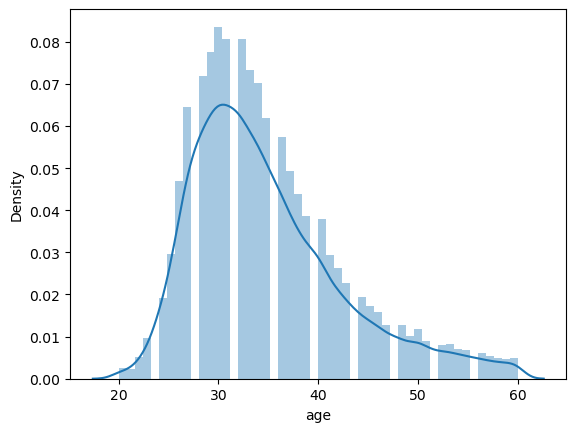

In [408]:
sns.distplot(train.age)

In [409]:
train.select_dtypes(exclude=np.number).isna().sum()

department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

In [410]:
train['education'].fillna(train['education'].mode()[0], inplace=True)

In [411]:
train.select_dtypes(exclude=np.number).isna().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

In [412]:
exp_tgt = train[['avg_training_score', 'is_promoted']].groupby('avg_training_score').value_counts().unstack(fill_value=0)
exp_tgt['%'] = exp_tgt[1] / (exp_tgt[0] + exp_tgt[1]) * 100
exp_tgt = exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)
exp_tgt.head(20)

is_promoted,0,1,%
avg_training_score,,,
99,0,35,100.000000
98,0,37,100.000000
97,0,49,100.000000
95,0,45,100.000000
96,1,47,97.916667
94,2,63,96.923077
93,9,75,89.285714
92,18,81,81.818182
91,41,76,64.957265


In [413]:
# Considered based on training score promotion has given

In [414]:
# Pre-processing steps
# Address missing data
# Encoding on categorical columns
# Standardize numerical columns
# Treat imbalance

In [415]:
# Import all required lib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [416]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [417]:
cat_cols = train.select_dtypes(include='object').columns.tolist()
num_cols = train.select_dtypes(exclude='object').columns.drop(['employee_id','is_promoted']).tolist()
print(tgt_col,ign_cols,cat_cols,num_cols, sep='\n')

['is_promoted']
['employee_id']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [418]:
cat_pipe_encode = Pipeline(
    steps= [
        ('impute_cat',SimpleImputer(strategy='most_frequent')), #Missing Value
        ('ohe', OneHotEncoder(handle_unknown='ignore')) # Cat Encoding
    ]
)

In [419]:
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num', SimpleImputer(strategy='median')), #Missing values
        ('scale',StandardScaler())# Cat Encoding
    ]
)  

In [420]:
# Pre-Processing
preprocess = ColumnTransformer(
    transformers = [
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [421]:
model_pipeline = Pipeline(
    steps = [
        ('Preprocessing',preprocess),
        ('model', LogisticRegression())

    ]
)

In [422]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [423]:
y = train[tgt_col]
y.head(2)

,is_promoted
0,0
1,0


In [424]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=42,test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((49327, 12), (5481, 12), (49327, 1), (5481, 1))

In [425]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [426]:
model_pipeline.predict_proba(val_X)

array([[0.99359595, 0.00640405],
       [0.98693299, 0.01306701],
       [0.96040613, 0.03959387],
       ...,
       [0.93961857, 0.06038143],
       [0.95178732, 0.04821268],
       [0.97686644, 0.02313356]])

In [427]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):

    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Train cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Train cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    y_pred_prob = model_pipeline.predict_proba(val_X) [:,1]
    plt.figure()
    fgr, tpr, thrsh = roc_curve(val_y,y_pred_prob)
    plt.plot(fgr, tpr)
    plt.show()

Train AUC
0.6277961162614325
Valid AUC
0.6308364154280857
Train cnf_matrix
[[44834   256]
 [ 3130  1107]]
Train cnf_matrix
[[5024   26]
 [ 316  115]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.81      0.26      0.40      4237

    accuracy                           0.93     49327
   macro avg       0.87      0.63      0.68     49327
weighted avg       0.92      0.93      0.91     49327

Train cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5050
           1       0.82      0.27      0.40       431

    accuracy                           0.94      5481
   macro avg       0.88      0.63      0.68      5481
weighted avg       0.93      0.94      0.92      5481



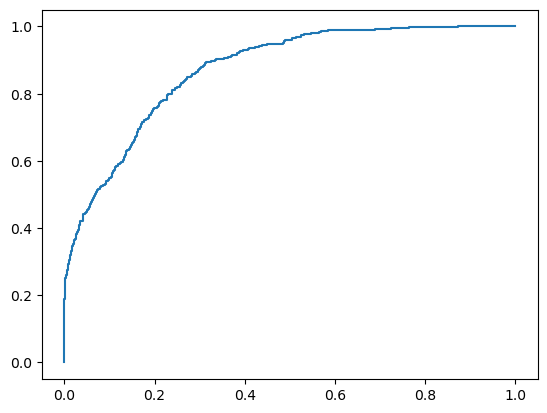

In [428]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

The model’s performance is stable across training and validation (as indicated by the AUC scores).
Since there’s no significant overfitting (the AUC values are close), L2 regularization should help stabilize the coefficients and improve generalization

We Selected 'l2' penalty for further hyperparameter for further tuning

In [429]:
param = [
    {
        'model':(LogisticRegression(),),
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    }
]

In [430]:
grid = GridSearchCV(estimator=model_pipeline,param_grid=param, cv=2, scoring='roc_auc')

In [431]:
grid.fit(train_X,train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': (LogisticRegression(C=0.5),),
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [432]:
grid.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [433]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.874382,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.871283,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.872014,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.871283,3


In [434]:
sub = pd.read_csv('sample_submission_M0L0uXE.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [435]:
test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [436]:
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [437]:
sub['is_promoted']=model_pipeline.predict(test)

In [438]:
sub.to_csv('submission-1.csv', index=False)

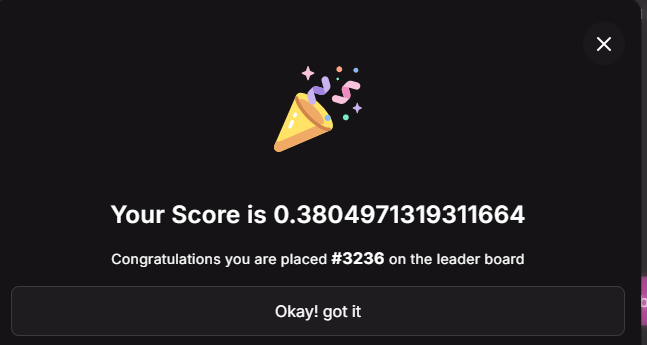

In [439]:
import joblib

In [440]:
from imblearn.over_sampling import RandomOverSampler

In [441]:
over_sampling = RandomOverSampler()

In [442]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [443]:
train_y.value_counts()

is_promoted
0              45090
1               4237
Name: count, dtype: int64

In [444]:
train_y_os.value_counts()

is_promoted
0              45090
1              45090
Name: count, dtype: int64

In [445]:
from sklearn.tree import DecisionTreeClassifier

In [446]:
param_2 = [
    {
        'model':(LogisticRegression(),),
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    },
    {
        'model':[DecisionTreeClassifier()],
        'model__max_depth':[3,5]

    }
]

In [447]:
grid_2 = GridSearchCV(estimator=model_pipeline,param_grid=param_2, cv=2, scoring='roc_auc')

In [448]:
grid_2.fit(train_X_os,train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImput...
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': (LogisticRegression(C=0.5, penalty=None),),
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [449]:
grid_2.best_params_

{'model': LogisticRegression(C=0.5, penalty=None),
 'model__C': 0.5,
 'model__penalty': None}

In [450]:
grid_2.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression(C=0.5, penalty=None))])

In [451]:
new_model = grid_2.best_estimator_

Train AUC
0.7922809692287729
Valid AUC
0.7964583859778089
Train cnf_matrix
[[34499 10591]
 [  765  3472]]
Train cnf_matrix
[[3873 1177]
 [  75  356]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     45090
           1       0.25      0.82      0.38      4237

    accuracy                           0.77     49327
   macro avg       0.61      0.79      0.62     49327
weighted avg       0.92      0.77      0.82     49327

Train cls rep
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      5050
           1       0.23      0.83      0.36       431

    accuracy                           0.77      5481
   macro avg       0.61      0.80      0.61      5481
weighted avg       0.92      0.77      0.82      5481



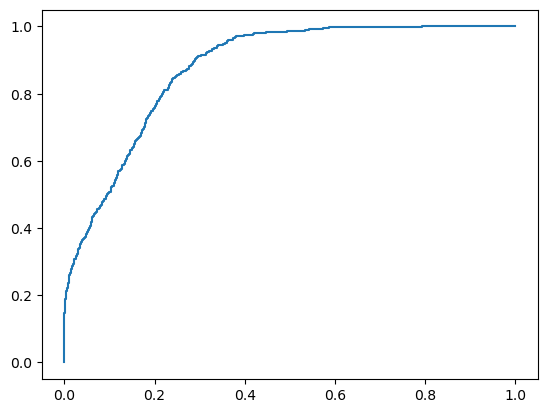

In [452]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

In [453]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': 'l2'}",0.877143,4
1,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': None}",0.877454,1
2,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': 'l2'}",0.877406,3
3,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': None}",0.877454,1
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.796188,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.849421,5


In [454]:
sub['is_promoted']=new_model.predict(test)
sub.to_csv('submission_2.csv', index=False)

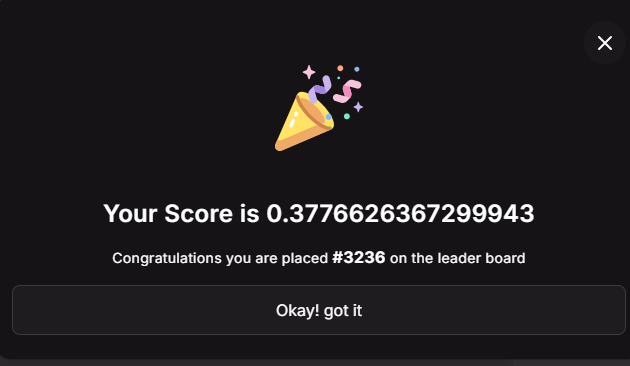

In [455]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [456]:
param_3 = [
    {
        'model':[LogisticRegression(),],
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    },
    {
        'model':[DecisionTreeClassifier()],
        'model__max_depth':[3,5]

    },
    {
        'model':[StackingClassifier(
            estimators =[
                ['sclf1', RandomForestClassifier()],
                ['sclf2', GradientBoostingClassifier()],
                ['sclf3', AdaBoostClassifier()],],
                final_estimator = LogisticRegression()
        )],
        'model__sclf1__max_depth':[4,8] ,
        'model__sclf2__n_estimators':[15,25] ,
        'model__sclf3__n_estimators':[5,35] ,
    }
]

In [457]:
grid_3 = GridSearchCV(estimator=model_pipeline,param_grid=param_3, cv=2, scoring='roc_auc')

In [458]:
grid_3.fit(train_X_os,train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImput...
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier(max_depth=8)],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier(n_estimators=25)],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier(n_estimators=5)]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='roc_auc')

In [459]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)],
                                ['sclf2',
                                 GradientBoostingClassifier(n_estimators=25)],
                                ['sclf3', AdaBoostClassifier(n_estimators=5)]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 25,
 'model__sclf3__n_estimators': 5}

In [460]:
grid_3.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sca...
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=25)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=5)]],
                                    final_estimator=LogisticRegression()))])

In [461]:
new_model_1 = grid_3.best_estimator_

Train AUC
0.797384163307403
Valid AUC
0.787029932691645
Train cnf_matrix
[[31458 13632]
 [  436  3801]]
Train cnf_matrix
[[3520 1530]
 [  53  378]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     45090
           1       0.22      0.90      0.35      4237

    accuracy                           0.71     49327
   macro avg       0.60      0.80      0.58     49327
weighted avg       0.92      0.71      0.78     49327

Train cls rep
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      5050
           1       0.20      0.88      0.32       431

    accuracy                           0.71      5481
   macro avg       0.59      0.79      0.57      5481
weighted avg       0.92      0.71      0.78      5481



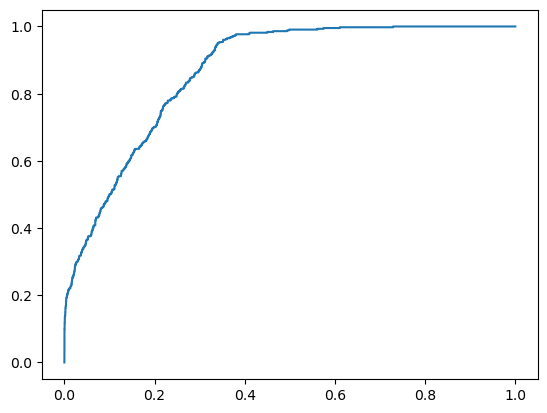

In [462]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_1)

In [463]:
res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.877143,6
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.877454,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.877406,5
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.877454,3
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.796188,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.849421,12
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.846278,13
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.850837,11
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.854710,10
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.858171,9


In [464]:
sub['is_promoted']=new_model_1.predict(test)
sub.to_csv('submission_3.csv', index=False)